In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expression used for text cleaning 
import nltk # natural language toolkit
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #trem frequency inverse documentry frequency vectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #Reduces into their root form
from sklearn.preprocessing import LabelEncoder




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanvi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
#load dataset
import pandas as pd

# Load the dataset
data = pd.read_csv("liar_dataset/fake.csv")

# Display first few rows
data.head()


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [15]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

In [5]:
data['type'].value_counts()



type
bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: count, dtype: int64

In [ ]:
# Download necessary NLTK datasets 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text cleaning function
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # remove numbers, punctuation, etc.
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Apply cleaning
data['clean_text'] = data['text'].apply(clean_text)

# Check result
data[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tanvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tanvi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,clean_text
0,Print They should pay all the back all the mon...,print pay back money plus interest entire fami...
1,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth bar...
2,Red State : \nFox News Sunday reported this mo...,red state fox news sunday reported morning ant...
3,Email Kayla Mueller was a prisoner and torture...,email kayla mueller prisoner tortured isi chan...
4,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,email healthcare reform make america great sin...


In [ ]:
# Encode the target labels (type column)
label_encoder = LabelEncoder()
data['encoded_label'] = label_encoder.fit_transform(data['type'])

# Features (X) and labels (y)
X = data['clean_text']
y = data['encoded_label']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
print("Number of classes:", len(label_encoder.classes_))


Training samples: 10399
Testing samples: 2600
Number of classes: 8


Training XGBoost model...

Model Accuracy: 91.88%

 Classification Report:
              precision    recall  f1-score   support

        bias       1.00      0.35      0.52        89
          bs       0.92      1.00      0.96      2299
  conspiracy       0.83      0.40      0.54        86
        fake       0.00      0.00      0.00         4
        hate       1.00      0.14      0.25        49
     junksci       0.90      0.45      0.60        20
      satire       1.00      0.24      0.39        29
       state       1.00      0.42      0.59        24

    accuracy                           0.92      2600
   macro avg       0.83      0.37      0.48      2600
weighted avg       0.92      0.92      0.90      2600



C:\Users\tanvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tanvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tanvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

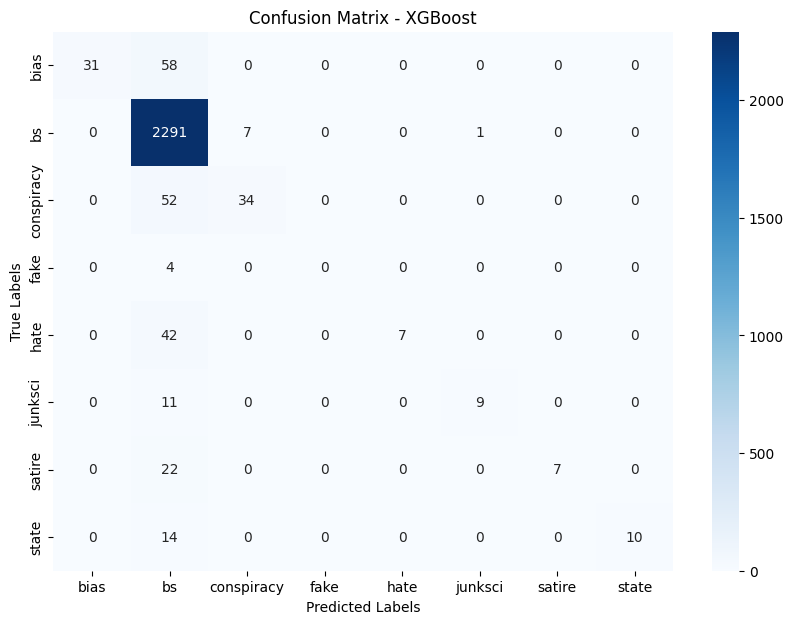

In [10]:
from xgboost import XGBClassifier
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    objective='multi:softmax',  # for multi-class classification
    num_class=8,                # number of unique labels (we confirmed 8)
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
print("Training XGBoost model...")
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {acc * 100:.2f}%\n")

# Classification report
print(" Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix Visualization
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()
